# WGU D209 TASK 1 REV 1 - MATTINSON

<div class="title">
    KNN Classification Using Churn Data<br>
    Mike Mattinson<br>
    Master of Science, Data Analytics, WGU.edu<br>
    D209: Data Mining I<br>
    Task 1 - 1st Submission<br>
    Dr. Festus Elleh<br>
    October 18, 2021<br>
</div>

<div class="impact" data-hdr="Abstract">___.</div>

<div class="impact" data-hdr="Keywords">Data Mining. KNN. Classification.</div>

<div class="part">Research Question (I)</div>

<h2 data-nbr="A1">Propose One Question</h2>Propose <b>one</b> question relevant to a real-world organizational situation that you will answer using one of the following classification methods:
•  k-nearest neighbor (KNN)
•  Naive Bayes

<div class="impact" data-hdr="Primary Question">The question has come up for a telecommunicatiosn company regarding churn. <b>Churn</b> is defined when a customer chooses to stop services. If the company has data on customers that have and have not churned in the past, is it possible to classify a new (or existing) customer based on their similarity to other customers with similar attributes that have and have not churned in the past. This analysis will consider two (2) attributes, <b>MonthlyCharge</b> and <b>Tenure</b> within the company's customer data of 10,000 customers. In addition, if the prediction is made, the analysis will also attempt to quantify the accuracy of the prediction.</div>

<h2 data-nbr="A2">Define One Goal</h2>Define <b>one</b> goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.

<div class="impact" data-hdr="Primary Goal">The analysis will attempt to predict <b>Churn</b> for a new customer with values of <b>MonthlyCharge</b> = $170.00 and <b>Tenure</b> = 1.0. This goal is within the scope of the company's customer data, both attributes are contained with the data for 10,000 customers and should provide adequate data for the prediction. The analysis will use K-nearest neighbors (KNN) to classify the new customer based on the k-nearest other customers with similar attributes.</div>

In [1]:
# define the new customer
import pandas as pd
newCustomer = pd.DataFrame([{'MonthlyCharge': 120.0 ,'Tenure': 5.0}])

<div class="part">Method Justification (II)</div>

<h2 data-nbr="B1">Explain Method and Outcomes</h2>Explain how the classification method you chose analyzes the selected data set. Include expected outcomes.

Explain KNN classification and expected outcomes_______

<h2 data-nbr="B2">Summarize One Assumption</h2>Summarize <b>one</b> assumption of the chosen classification method.

Summarize one KNN assumption_______

<h2 data-nbr="B3">Justify Packages</h2>List the packages or libraries you have chosen for <b>Python</b> or R, and justify how each item on the list supports the analysis.

<div class="impact" data-hdr="Data Manipulation">The pandas package enables common data analytics.</div>

In [2]:
# import and configure pandas
import pandas as pd
pd.set_option('precision',2)
pd.set_option('max_columns',9)
pd.set_option('display.width', None)

<div class="impact" data-hdr="Scientific Comptuing">Standard packages enable scientific computing and number crunching.</div>

In [3]:
# import and configure scientific computing
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

<div class="impact" data-hdr="Modeling and Metrics">Standard packages that enable modeling and metrics..</div>

In [4]:
# import and configure sklearn
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors

<div class="impact" data-hdr="Plotting">Matplotlib is a standard plotting library for Python that enables custom visualizations of the data.</div>

In [5]:
# import and configure matplotlib
import matplotlib.pyplot as plt
plt.rc("font", size=14)
%matplotlib inline

<div class="impact" data-hdr="Jupyter Notebook and IPython">These libraries enable the Jupyter notebook to work with HTML code. And, I am able to apply custom CSS styles to the notebook.</div>

In [6]:
# import and configure IPython.display
from IPython.core.display import HTML
from IPython.display import Image
from IPython.display import display

In [7]:
HTML(open('custom.css', 'r').read()) # apply custom styles

<div class="impact" data-hdr="Helper Functions">In addition to above packages, the following functions are defined within the notebook to help with common tasks.</div>

In [8]:
# helper function
def plotDataset(ax, data, xFeature, yFeature, target, neighbors, showLabel=True, **kwargs):
    
    # Churn == True
    subset = data.loc[data[target]==True]
    ax.scatter(subset[xFeature], subset[yFeature], marker='o',
              label=str(target)+'=True' if showLabel else None, color='C1', **kwargs)
    
    # Churn == False
    subset = data.loc[data[target]==False]
    ax.scatter(subset[xFeature], subset[yFeature], marker='D',
              label=str(target)+'=False' if showLabel else None, color='C0', **kwargs)
    
    # labels
    if data.shape[0] < 200:
        for idx, row in data.iterrows():
            ax.annotate(row.Number, (row[xFeature]+1, row[yFeature]+1))  

<div class="part">Data Preparation (III)</div>

<h2 data-nbr="C1">Describe One Goal</h2>Describe <b>one</b> data preprocessing goal relevant to the classification method from part A1.

<div class="impact" data-hdr="Data Goal">In order to apply the KNN classification analysis to this problem, the company data must be imported into the Python environment and then the raw numerical data must be normalized. In addition, the company data will be broken up into two (2) subsets, 70% in a training dataset, and the remain 30% in a testing or validation dataset. The KNN will then use the training set to build the model, and it will use the test set to validate the model. The main goal for data preparation will be to define these subsets of data is a manner that is as simple and intuitive as possible, to allow anyone to follow the analysis throughout the notebook.</div>
<ul class="a">
    <li><b>df</b> = the raw set of 10,000 customer records
    <li><b>trainData</b> = a 70% subset of the raw data 
    <li><b>validData</b> = a 30% subset of the raw data
    <li><b>churnNorm</b> = the standardized set of 10,000 customer records
    <li><b>trainNorm</b> = a 70% subset of the standardized data. This will be created so that the index of records matches the index for <b>trainData</b>
    <li><b>validNorm</b> = a 30% subset of the standardized data. This will be created so that the index of the records matches the index for <b>validData</b>
    <li><b>X</b> the feature data from the standardized data (i.e. <b>MonthlyCharge</b>, and <b>Tenure</b>)
    <li><b>y</b> = the target data from the standardized data (i.e. <b>Churn</b>)
</ul>

<h2 data-nbr="C2">Describe Variables</h2>Identify the initial data set variables that you will use to perform the analysis for the classification question from part A1, and classify each variable as continuous or categorical.

For this analysis, I will consider two (2) features, <b>MonthlyCharge</b> and <b>Tenure</b>, and one (1) target, <b>Churn</b>.

<div class="impact" data-hdr="Churn (Target)">Whether the customer discontinued service within the last month (yes, no)</div>

<div class="impact" data-hdr="Tenure">Number of months the customer has stayed with the provider</div>

<div class="impact" data-hdr="MonthlyCharge">The amount charged to the customer monthly. This valu e reflects an average per customer.</div>

In [9]:
# define target and feature data
features = ['MonthlyCharge','Tenure']
target = 'Churn'

In [10]:
# read subset of company's customer data from csv file
df = pd.read_csv('churn_clean.csv', 
        usecols=['MonthlyCharge','Tenure','Churn']) 
# convert churn from object [Yes No] to bool [True False]
df['Churn'] = df['Churn'].replace({"No":False, "Yes":True})
df['Churn'] = df['Churn'].astype('bool')
df = df.iloc[::100, :] # temp smaller data for trouble shooting...
df.reset_index(drop=True, inplace=True)
df['Number'] = df.index
columns=['MonthlyCharge','Tenure','Churn','Number']
df = df[columns]
df.head(10)

,MonthlyCharge,Tenure,Churn,Number
0,172.46,6.80,False,0
1,222.66,14.46,True,1
2,252.64,1.47,True,2
3,214.95,4.44,False,3
4,220.12,8.61,True,4
5,92.46,11.92,False,5
6,149.98,16.12,False,6
7,117.49,9.84,False,7
8,232.62,8.06,True,8
9,129.96,11.56,True,9


In [11]:
# identify the initial set of variables
for idx, c in enumerate(df.columns):
    if df.dtypes[c] in ('float', 'int', 'int64'):
        print('\n{}. {} is numerical (CONTINUOUS).'.format(idx+1, c))
    elif df.dtypes[c] == bool:
        print('\n{}. {} is boolean (BINARY): {}.'.format(idx+1,c,df[c].unique()))
    else:
        print('\n{}. {} is categorical (CATEGORICAL): {}.'.format(idx+1,c,df[c].unique()))


1. MonthlyCharge is numerical (CONTINUOUS).

2. Tenure is numerical (CONTINUOUS).

3. Churn is boolean (BINARY): [False  True].

4. Number is numerical (CONTINUOUS).


In [12]:
# describe numeric feature data
df[features].describe()

,MonthlyCharge,Tenure
count,100.00,100.00
mean,172.59,33.91
std,46.68,26.42
min,79.98,1.47
25%,137.50,8.13
50%,162.49,29.49
75%,200.15,60.36
max,287.64,71.85


In [13]:
# use .info to show the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MonthlyCharge  100 non-null    float64
 1   Tenure         100 non-null    float64
 2   Churn          100 non-null    bool   
 3   Number         100 non-null    int64  
dtypes: bool(1), float64(2), int64(1)
memory usage: 2.6 KB


In [14]:
# use .shape to show total number of row and cols
df.shape

(100, 4)

In [15]:
df.shape[0]

100

<div class="impact" data-hdr="Summary">The company's customer raw data has been read into the df variable and consists of 10,000 customer records with three (3) variables each. Two (2) of the variables will be used as features and are continuous (numerical) data, and the the third variable is our target, binary variable.</div>

<h2 data-nbr="C3">Explain Steps</h2>Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.

<div class="step" data-hdr="1">Read in selected company data</div>Applicable customer data (<b>Churn</b>, <b>MonthlyCharge</b> and <b>Tenure</b>) from the company data was read into Python environment using pandas .read_cs() function using the usecols=[] option. This was completed in section C2 [9] above.

<div class="step" data-hdr="2">Convert cateogrical data</div>Initially, the <b>Churn</b> variable was categorical, each row was Yes or No values, so this step converted the categorical data to boolean data using pandas .replace() function. In Python, boolean data is considered as numerical data, 1 or 0, or type(int). This was completed in section C2 [9] above.

<div class="step" data-hdr="3">Describe initial set of variables</div>For each variable of data, describe the data whether numerical or categorical. I used a function I created to loop through and list each one and a short description. Also, use pandas .describe() method to show descriptive statistics for numerical data. This was completed in section C2 [10] and C2[11] above.

<div class="step" data-hdr="4">Quick check for null values</div>The company data was previously cleaned and prepared, so I do not expect to find null values, but using the pandas .info() I can observe quickly that there are not any null values for any of the 10,000 customer records. This was completed in section C2 [12] above.

<h2 data-nbr="C4">Provide Clean Data</h2>Provide a copy of the cleaned data set.

In [16]:
# provide copy of cleaned data
df.to_csv('d209_task1_raw_data.csv', index=False, header=True)
print(df.columns.to_series().groupby(df.dtypes).groups)

{bool: ['Churn'], int64: ['Number'], float64: ['MonthlyCharge', 'Tenure']}


<div class="part">Analysis (IV)</div>

<h2 data-nbr="D1">Split Data</h2>Split the data into training and test data sets and provide the file(s).

In [17]:
# train test split raw data
trainData, validData = train_test_split(df, test_size=0.3, random_state=13)
trainData.to_csv('d209_task1_trainData.csv', index=False, header=True)
validData.to_csv('d209_task1_validData.csv', index=False, header=True)
print(trainData.info())
print(validData.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 39 to 82
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MonthlyCharge  70 non-null     float64
 1   Tenure         70 non-null     float64
 2   Churn          70 non-null     bool   
 3   Number         70 non-null     int64  
dtypes: bool(1), float64(2), int64(1)
memory usage: 2.3 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 37 to 47
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MonthlyCharge  30 non-null     float64
 1   Tenure         30 non-null     float64
 2   Churn          30 non-null     bool   
 3   Number         30 non-null     int64  
dtypes: bool(1), float64(2), int64(1)
memory usage: 990.0 bytes
None


<h2 data-nbr="D2">Describe Analysis</h2>Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.

<div class="impact" data-hdr="Data Exploratory Analysis">I will create a scatter plot of the two (2) features showing differences between Churn=True and Churn=False customers. I will plot the new customer in the same plot to see where the new and existing customers are similar. We will then see what we expect the classification results will yield in the end.</div>

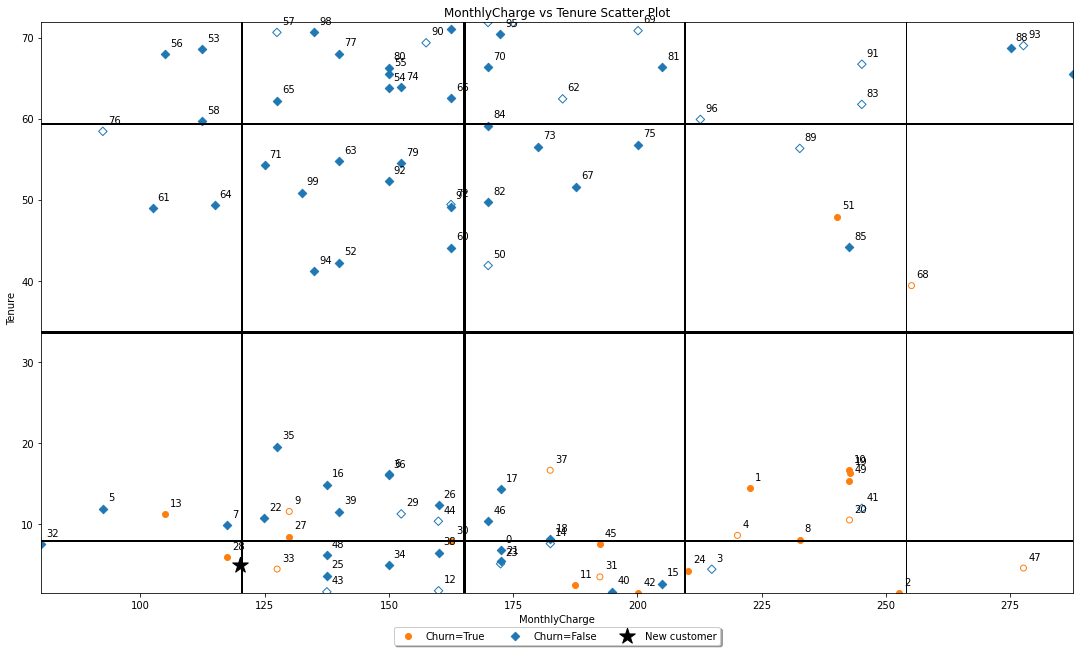

In [18]:
# scatter plot using the plotDataset() helper function
xFeature = 'MonthlyCharge' 
yFeature = 'Tenure'
neighbors = []
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plotDataset(ax, trainData, xFeature, yFeature, target, neighbors)
plotDataset(ax, validData, xFeature, yFeature, target, neighbors, showLabel=False, facecolors='none')

# vertical lines for means for xFeature
c = 'black'
ax.axvline(trainData[xFeature].mean(), color=c, lw=3)
ax.axvline(trainData[xFeature].mean()+1*trainData[xFeature].std(), color=c, lw=2)
ax.axvline(trainData[xFeature].mean()-1*trainData[xFeature].std(), color=c, lw=2)
ax.axvline(trainData[xFeature].mean()+2*trainData[xFeature].std(), color=c, lw=1)
ax.axvline(trainData[xFeature].mean()-2*trainData[xFeature].std(), color=c, lw=1)

# horizontal lines for means for yFeature
c = 'black'
ax.axhline(trainData[yFeature].mean(), color=c, lw=3)
ax.axhline(trainData[yFeature].mean()+1*trainData[yFeature].std(), color=c, lw=2)
ax.axhline(trainData[yFeature].mean()-1*trainData[yFeature].std(), color=c, lw=2)
ax.axhline(trainData[yFeature].mean()+2*trainData[yFeature].std(), color=c, lw=1)
ax.axhline(trainData[yFeature].mean()-2*trainData[yFeature].std(), color=c, lw=1)

# plot new customer as a Star
ax.scatter(newCustomer.MonthlyCharge, newCustomer.Tenure, marker='*',
          label='New customer', color='black', s=270)

title = str(xFeature) + ' vs ' + str(yFeature) + ' Scatter Plot'
plt.title(title)
plt.xlabel(xFeature) 
plt.ylabel(yFeature)
ax.set_xlim(df[xFeature].min(),df[xFeature].max())
ax.set_ylim(df[yFeature].min(),df[yFeature].max())
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
file = 'd209_fig_4_1_' + title.replace(' ','_') + '.png'
fig.savefig(file, dpi=100)
#plt.close(1)
plt.show()

<div class="impact" data-hdr="FIGURE 4.1">SCATTER PLOT OF MONTHLYCHARGE VS TENURE FOR TRAINING SET (SOLID MARKERS) AND TEST SET (HOLLOW MARKERS) AND THE NEW CUSTOMER (STAR MARKER) TO BE CLASSIFIED.</div>

<div class="impact" data-hdr="Scale Data">The z-score method (often called standardization) transforms the info into distribution with a mean of 0 and a typical deviation of 1. Each standardized value is computed by subtracting the mean of the corresponding feature then dividing by the quality deviation. I will use the sklearn .StandardScaler() method to create a standardized data set.</div>https://www.geeksforgeeks.org/data-normalization-with-pandas/

In [19]:
# use training data to learn the transformation
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['MonthlyCharge','Tenure']])

StandardScaler()

In [20]:
# transform the full dataset
churnNorm = pd.concat([pd.DataFrame(scaler.transform(df[features]),
            columns=['zMonthlyCharge','zTenure']),
            df[['Churn','Number']]], axis=1)
trainNorm = churnNorm.iloc[trainData.index]
validNorm = churnNorm.iloc[validData.index]

In [21]:
churnNorm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   zMonthlyCharge  100 non-null    float64
 1   zTenure         100 non-null    float64
 2   Churn           100 non-null    bool   
 3   Number          100 non-null    int64  
dtypes: bool(1), float64(2), int64(1)
memory usage: 2.6 KB


In [22]:
# scale new customer data
newCustomerNorm = pd.DataFrame(scaler.transform(newCustomer),
        columns=['zMonthlyCharge', 'zTenure'])
print(newCustomerNorm.round(2))
print(newCustomer.round(2))

   zMonthlyCharge  zTenure
0           -1.02    -1.12
   MonthlyCharge  Tenure
0          120.0     5.0


In [23]:
# use NearestNeighbors from scikit-learn to compute knn
knn = NearestNeighbors(n_neighbors=7)
knn.fit(trainNorm.iloc[:,0:2])
distances, indices = knn.kneighbors(newCustomerNorm)
trainNorm.iloc[indices[0],:] 

,zMonthlyCharge,zTenure,Churn,Number
28,-1.08,-1.09,True,28
7,-1.08,-0.93,False,7
22,-0.91,-0.90,False,22
27,-0.79,-0.99,True,27
48,-0.62,-1.08,False,48
25,-0.62,-1.18,False,25
13,-1.36,-0.88,True,13


In [24]:
# Calculating and plot error rate for range of k-values
train_X = trainNorm[['zMonthlyCharge','zTenure']]
train_y = trainNorm['Churn']
valid_X = validNorm[['zMonthlyCharge','zTenure']]
valid_y = validNorm['Churn']
error = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_X, train_y)
    pred_i = knn.predict(valid_X)
    error.append(np.mean(pred_i != valid_y))
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
title = 'Error Rate by k-value'
plt.title(title)
plt.xlabel('K Value')
plt.ylabel('Mean Error')
file = 'd209_fig_4_2_' + title.replace(' ','_') + '.png'
fig.savefig(file, dpi=100)
plt.close(1)

Image retrieved from: d209_fig_4_2_Error_Rate_by_k-value.png


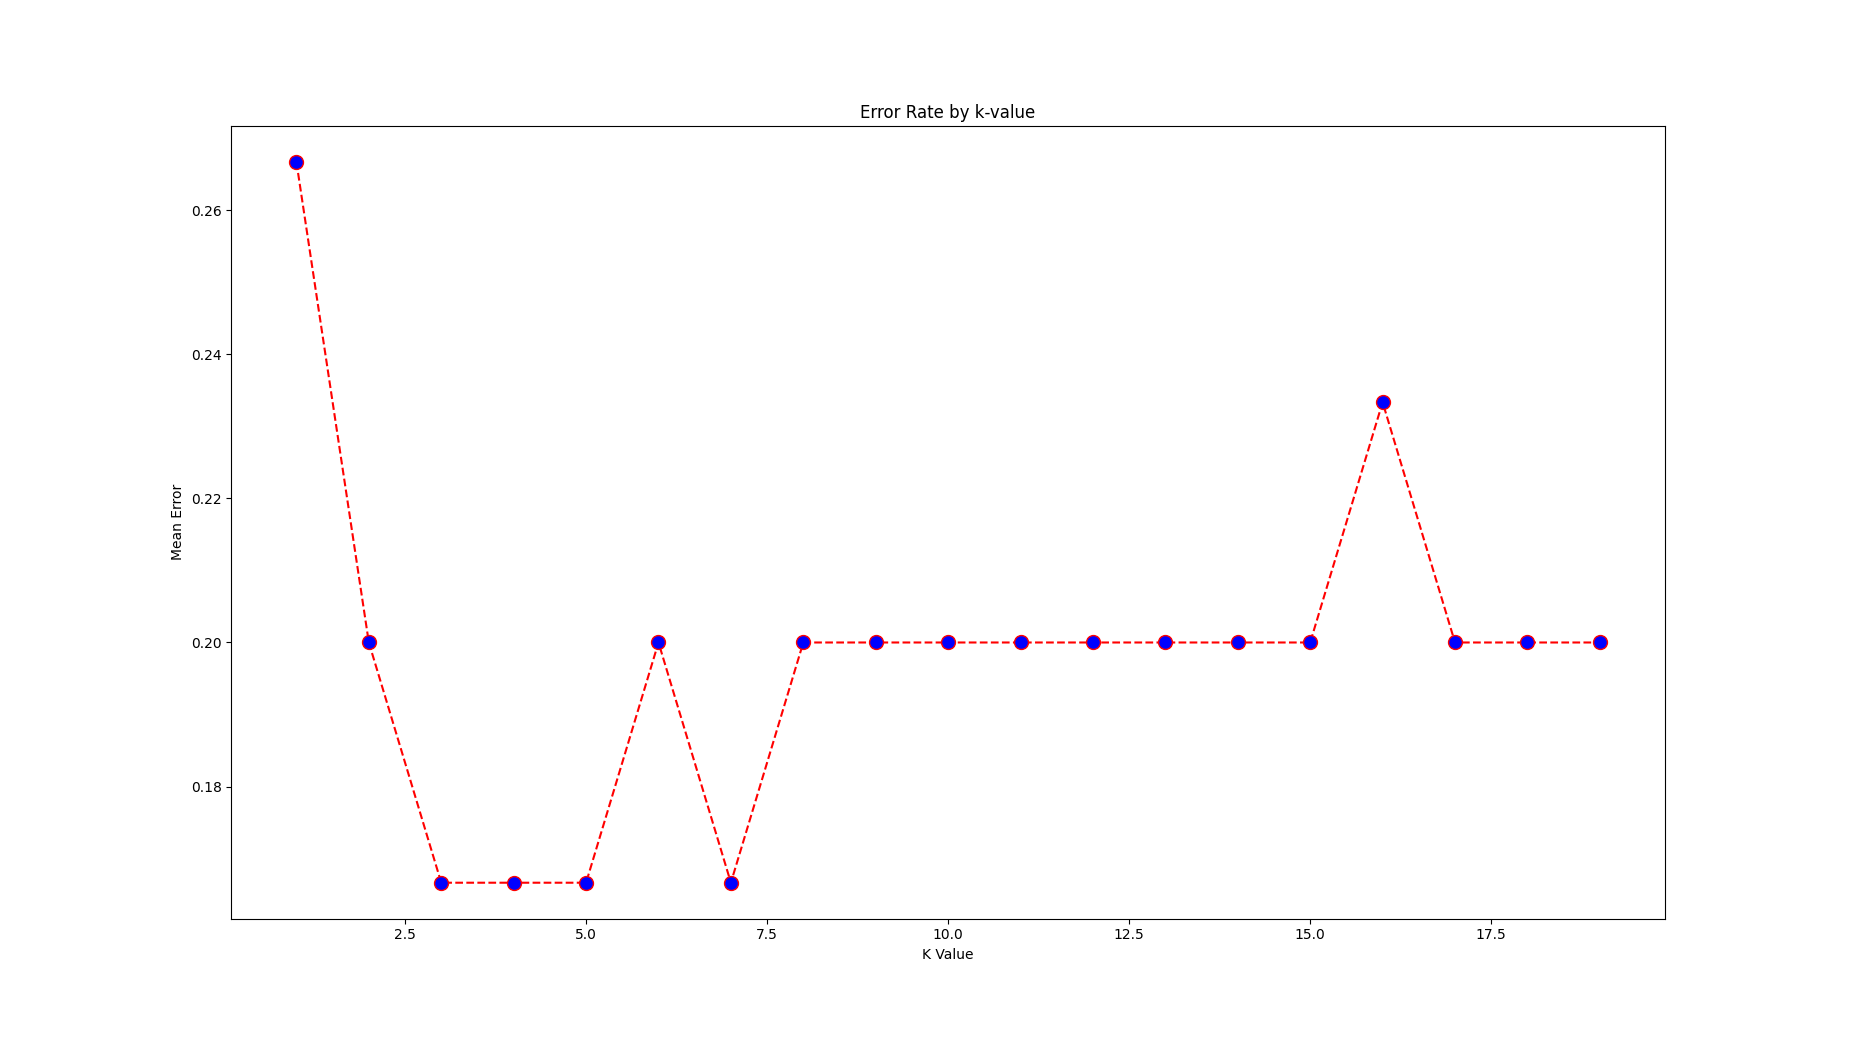

In [25]:
print('Image retrieved from: {}'.format(file))
Image(filename=file) 

<div class="impact" data-hdr="FIGURE 4.2">ERROR RATE BY K-VALUE</div>

<div class="impact" data-hdr="Final Prediction">Calculate final prediction using the complete set of scaled data. Select a value for k from the figure above, let's select k=11 which looks like it should have about 84% accurary.</div>

In [45]:
# retrain with full data.
X = churnNorm[['zMonthlyCharge','zTenure']]
y = churnNorm['Churn']
k=7
knn = KNeighborsClassifier(n_neighbors=k).fit(X, y)
distances, indices = knn.kneighbors(newCustomerNorm)
print('Prediction for new customer (based on k={} nearest neighbors):\n{} is {}'.format(k, newCustomerNorm, knn.predict(newCustomerNorm)))
print('Distances: ',distances)
print('Indices: ',indices)
print('Max:', distances.max())

Prediction for new customer (based on k=7 nearest neighbors):
   zMonthlyCharge  zTenure
0           -1.02    -1.12 is [ True]
Distances:  [[0.06897883 0.17126197 0.1980875  0.25101398 0.26285869 0.3419213
  0.39777547]]
Indices:  [[28 33  7 22 27  9 48]]
Max: 0.3977754707666734


In [46]:
# list neighbors from scaled data
churnNorm.iloc[indices[0],:]

,zMonthlyCharge,zTenure,Churn,Number
28,-1.08,-1.09,True,28
33,-0.85,-1.15,True,33
7,-1.08,-0.93,False,7
22,-0.91,-0.90,False,22
27,-0.79,-0.99,True,27
9,-0.79,-0.87,True,9
48,-0.62,-1.08,False,48


In [47]:
# list neighbors from raw data
df_neighbors = df.iloc[indices[0],:]
display(df_neighbors)
print(df_neighbors.index)
neighbors = df_neighbors.index
neighbors = neighbors.to_list()
print(neighbors)
print(type(neighbors))

,MonthlyCharge,Tenure,Churn,Number
28,117.44,5.95,True,28
33,127.51,4.46,True,33
7,117.49,9.84,False,7
22,124.96,10.73,False,22
27,129.98,8.44,True,27
9,129.96,11.56,True,9
48,137.47,6.14,False,48


Int64Index([28, 33, 7, 22, 27, 9, 48], dtype='int64')
[28, 33, 7, 22, 27, 9, 48]
<class 'list'>


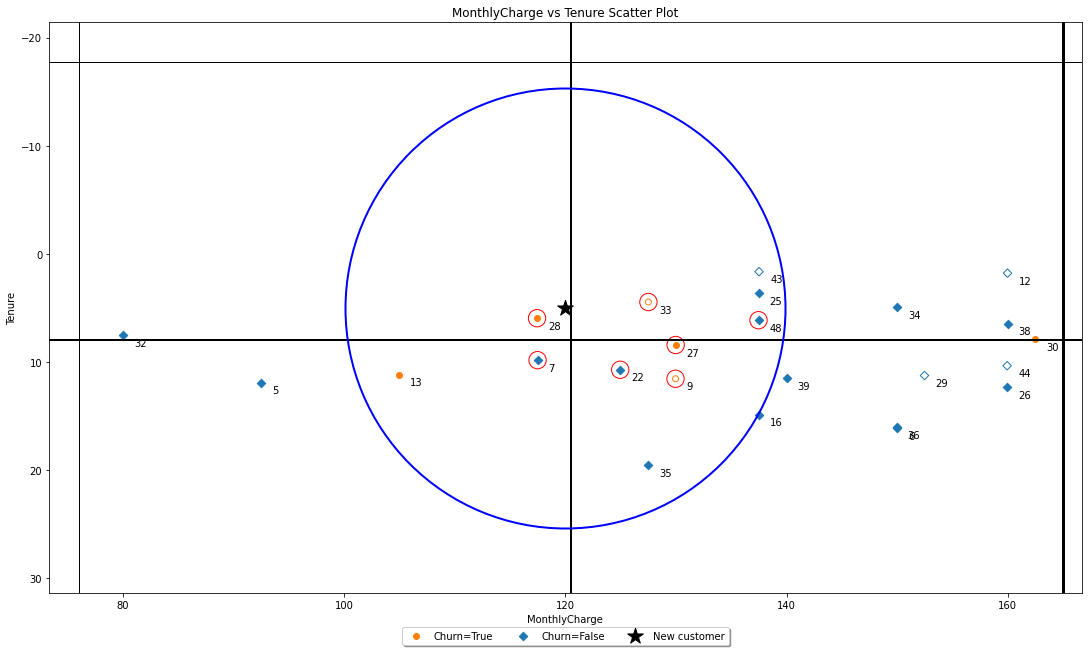

In [51]:
# scatter plot using the plotDataset() helper function
xFeature = 'MonthlyCharge' 
yFeature = 'Tenure'
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plotDataset(ax, trainData, xFeature, yFeature, target, neighbors)
plotDataset(ax, validData, xFeature, yFeature, target, neighbors, showLabel=False, facecolors='none')

# vertical lines for means for xFeature
c = 'black'
ax.axvline(trainData[xFeature].mean(), color=c, lw=3)
ax.axvline(trainData[xFeature].mean()+1*trainData[xFeature].std(), color=c, lw=2)
ax.axvline(trainData[xFeature].mean()-1*trainData[xFeature].std(), color=c, lw=2)
ax.axvline(trainData[xFeature].mean()+2*trainData[xFeature].std(), color=c, lw=1)
ax.axvline(trainData[xFeature].mean()-2*trainData[xFeature].std(), color=c, lw=1)

# horizontal lines for means for yFeature
c = 'black'
ax.axhline(trainData[yFeature].mean(), color=c, lw=3)
ax.axhline(trainData[yFeature].mean()+1*trainData[yFeature].std(), color=c, lw=2)
ax.axhline(trainData[yFeature].mean()-1*trainData[yFeature].std(), color=c, lw=2)
ax.axhline(trainData[yFeature].mean()+2*trainData[yFeature].std(), color=c, lw=1)
ax.axhline(trainData[yFeature].mean()-2*trainData[yFeature].std(), color=c, lw=1)

# plot new customer as a Star
ax.scatter(newCustomer.MonthlyCharge, newCustomer.Tenure, marker='*',
          label='New customer', color='black', s=270)

            
# highlight neighbors
if len(neighbors) > 0:
    for n in neighbors:
        point = df.iloc[n]
        ax.scatter(point.MonthlyCharge, point.Tenure, marker='o',
                color='red', s=300, facecolors='none')

title = str(xFeature) + ' vs ' + str(yFeature) + ' Scatter Plot'
plt.title(title)
plt.xlabel(xFeature) 
plt.ylabel(yFeature)

# set axis limits
left = float(newCustomer.MonthlyCharge) - df['MonthlyCharge'].std()
right = float(newCustomer.MonthlyCharge) + df['MonthlyCharge'].std()
top = float(newCustomer.Tenure) - df['Tenure'].std()
bottom = float(newCustomer.Tenure) + df['Tenure'].std()
ax.set_xlim(left,right)
ax.set_ylim(bottom, top)

circle_rad = 220  # radius of most distant neighbor
ax.plot(newCustomer.MonthlyCharge, newCustomer.Tenure, 'o',
        ms=circle_rad * 2, mec='b', mfc='none', mew=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
file = 'd209_fig_4_1_' + title.replace(' ','_') + '.png'
fig.savefig(file, dpi=100)
#plt.close(1)
plt.show()




<div class="impact" data-hdr="Summary">The KNN model calculated the new customer as Churn=False, with all of the three (3) nearest neighbors having Churn=False, which is what we expected.</div>

<h2 data-nbr="D3">Provide Code</h2>Provide the code used to perform the classification analysis from part D2.

All code and output is contained within this Jupyter notebook.

<div class="part">Data Summary and Implications (V)</div>

<h2 data-nbr="E1">Explain Accuracy</h2>Explain the accuracy and the area under the curve (AUC) of your classification model.

<div class="impact" data-hdr="Confusion and Classification Report">Look at confusion and classification report to determin overall accuracy of the knn model.</div>

In [50]:
# confusion and classification report
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X, y)
y_pred = classifier.predict(X)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[74  3]
 [10 13]]
              precision    recall  f1-score   support

       False       0.88      0.96      0.92        77
        True       0.81      0.57      0.67        23

    accuracy                           0.87       100
   macro avg       0.85      0.76      0.79       100
weighted avg       0.87      0.87      0.86       100



<div class="impact" data-hdr="Receiver Operation Characteristic (ROC)">Calculate and plot ROC.</div>

<div class="impact" data-hdr="Area Under the Curve (AOC)">Calculate AUC.</div>

In [32]:
# calculate AUC
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y, y_pred, pos_label=2)
metrics.auc(fpr, tpr)

p:\code_wgu\5\v\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


nan

<h2 data-nbr="E2">Discuss Results and Implications</h2>Discuss the results and implications of your classification analysis.

<div class="impact" data-hdr="Summary">Looks like [6902+2012] predictions on the diagonal were correct for an accuracy of about 89%. Analysis predicts 89% that the new customer is Churn=False, so, there is an 11% chance that the new customer is actually Churn=True.</div>

<h2 data-nbr="E3">Discuss One Limitation</h2>Discuss <b>one</b> limitation of your data analysis.

<div class="impact" data-hdr="Limitation">It occus to me that a new customer is new, that is, their <b>Tenure</b> will always be low compared to other existing customers. The KNN analysis will never make it to the higher <b>Tenure</b> numbers. Future study may look at other features instead such as <b>Income</b>, <b>Bandwidth_GB_Year</b>, or <b>Outage_sec_perweek</b> which may provide better insight.</div>

<h2 data-nbr="E4">Recommendations</h2>Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.

<div class="part">Demonstration (VI)</div>

<h2 data-nbr="F">Provide Panapto Video</h2>Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.

<div class="impact" data-hdr="Video">Panapto video was created and is located at:</div>https://wgu.edu

<h2 data-nbr="G">Web Sources</h2>Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.

<h2 data-nbr="H">Acknowledge Sources</h2>Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.